### Analysis of Students' Study Time Distribution: Bell Curve and Quartiles

C:\Users\SON\AppData\Local\Temp\ipykernel_23348\3519539028.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(total_time_spent, shade=True, color="skyblue", alpha=0.7, linewidth=2)


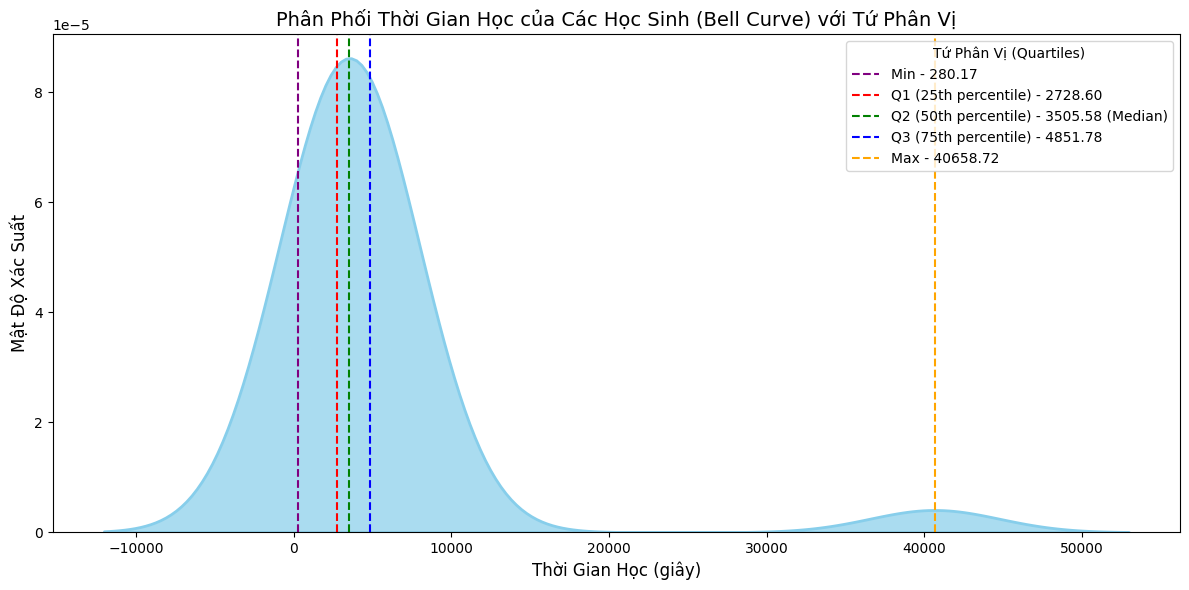

Min, Q1, Q2, Q3, and Max:
Min: 280.17
Q1 (25th percentile): 2728.60
Q2 (50th percentile): 3505.58
Q3 (75th percentile): 4851.78
Max: 40658.72


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'other_logs.xlsx' 
df_logs = pd.read_excel(file_path, engine='openpyxl')

df_logs['timestamp'] = pd.to_datetime(df_logs['timestamp'], errors='coerce')

df_logs['time_diff'] = df_logs.groupby('userName')['timestamp'].diff()

step_logs = df_logs[df_logs['logType'] == 'step']

total_time_spent = step_logs.groupby('userName')['time_diff'].sum().dt.total_seconds()

Q1 = total_time_spent.quantile(0.25)
Q2 = total_time_spent.quantile(0.50)  
Q3 = total_time_spent.quantile(0.75)

min_value = total_time_spent.min()
max_value = total_time_spent.max()

plt.figure(figsize=(12, 6))

sns.kdeplot(total_time_spent, shade=True, color="skyblue", alpha=0.7, linewidth=2)

plt.axvline(min_value, color='purple', linestyle='--', label=f'Min - {min_value:.2f}')
plt.axvline(Q1, color='red', linestyle='--', label=f'Q1 (25th percentile) - {Q1:.2f}')
plt.axvline(Q2, color='green', linestyle='--', label=f'Q2 (50th percentile) - {Q2:.2f} (Median)')
plt.axvline(Q3, color='blue', linestyle='--', label=f'Q3 (75th percentile) - {Q3:.2f}')
plt.axvline(max_value, color='orange', linestyle='--', label=f'Max - {max_value:.2f}')

plt.title('Phân Phối Thời Gian Học của Các Học Sinh (Bell Curve) với Tứ Phân Vị', fontsize=14)
plt.xlabel('Thời Gian Học (giây)', fontsize=12)
plt.ylabel('Mật Độ Xác Suất', fontsize=12)
plt.legend(title="Tứ Phân Vị (Quartiles)", loc='upper right')

plt.tight_layout()
plt.show()

print("Min, Q1, Q2, Q3, and Max:")
print(f"Min: {min_value:.2f}")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q2 (50th percentile): {Q2:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"Max: {max_value:.2f}")


### Analysis of Student Diligence Based on Time Spent Learning

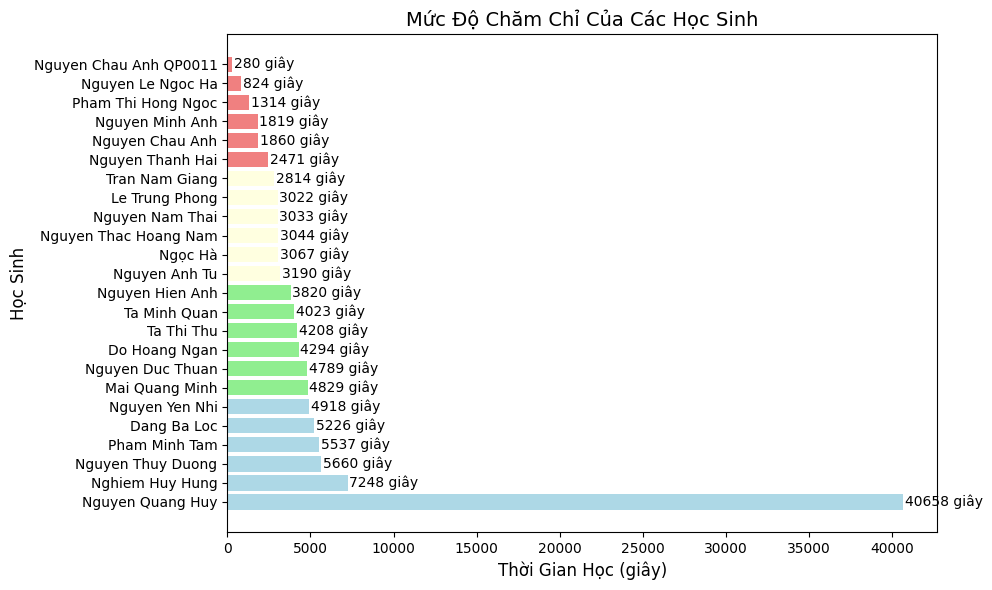

                        Tổng Thời Gian Học (giây) Mức Độ Chăm Chỉ
userName                                                         
Nguyen Quang Huy                        40658.718            High
Nghiem Huy Hung                          7248.137            High
Nguyen Thuy Duong                        5660.417            High
Pham Minh Tam                            5537.607            High
Dang Ba Loc                              5226.008            High
Nguyen Yen Nhi                           4918.387            High
Mai Quang Minh                           4829.577     Medium-High
Nguyen Duc Thuan                         4789.079     Medium-High
Do Hoang Ngan                            4294.525     Medium-High
Ta Thi Thu                               4208.279     Medium-High
Ta Minh Quan                             4023.706     Medium-High
Nguyen Hien Anh                          3820.755     Medium-High
Nguyen Anh Tu                            3190.400      Medium-Low
Ngọc Hà   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'other_logs.xlsx'  
df_logs = pd.read_excel(file_path, engine='openpyxl')

df_logs['timestamp'] = pd.to_datetime(df_logs['timestamp'], errors='coerce')

df_logs['time_diff'] = df_logs.groupby('userName')['timestamp'].diff()

step_logs = df_logs[df_logs['logType'] == 'step']

total_time_spent = step_logs.groupby('userName')['time_diff'].sum().dt.total_seconds()

total_time_spent_cleaned = pd.to_numeric(total_time_spent, errors='coerce')

total_time_spent_cleaned = total_time_spent_cleaned.dropna()

Q1_cleaned = total_time_spent_cleaned.quantile(0.25)
Q2_cleaned = total_time_spent_cleaned.quantile(0.50)
Q3_cleaned = total_time_spent_cleaned.quantile(0.75)

min_value_cleaned = total_time_spent_cleaned.min()
max_value_cleaned = total_time_spent_cleaned.max()

def categorize_time_spent(time_spent):
    if time_spent <= Q1_cleaned:
        return 'Low'
    elif time_spent <= Q2_cleaned:
        return 'Medium-Low'
    elif time_spent <= Q3_cleaned:
        return 'Medium-High'
    else:
        return 'High'

categories_cleaned = total_time_spent_cleaned.apply(categorize_time_spent)

result_df_sorted_cleaned = pd.DataFrame({'Tổng Thời Gian Học (giây)': total_time_spent_cleaned, 'Mức Độ Chăm Chỉ': categories_cleaned})

result_df_sorted_cleaned = result_df_sorted_cleaned.loc[total_time_spent_cleaned.sort_values(ascending=False).index]

category_colors = {'Low': 'lightcoral', 'Medium-Low': 'lightyellow', 'Medium-High': 'lightgreen', 'High': 'lightblue'}

plt.figure(figsize=(10, 6))

bars = plt.barh(result_df_sorted_cleaned.index, total_time_spent_cleaned[result_df_sorted_cleaned.index],
                color=[category_colors[cat] for cat in result_df_sorted_cleaned['Mức Độ Chăm Chỉ']])

plt.title('Mức Độ Chăm Chỉ Của Các Học Sinh', fontsize=14)
plt.xlabel('Thời Gian Học (giây)', fontsize=12)
plt.ylabel('Học Sinh', fontsize=12)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + bar.get_height() / 2, f'{int(width)} giây', va='center')

plt.tight_layout()
plt.show()

print(result_df_sorted_cleaned)

result_df_sorted_cleaned.to_csv('sorted_student_time_spent.csv', index=False)
